CNN

In [25]:
import tensorflow as tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [26]:
(X_train, y_train) ,(X_test, y_test) = datasets.cifar10.load_data()

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
X_test.shape

(10000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
y_train = y_train.reshape(-1,) #making y_train 1 dimentional from 2 dimentional array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
classes = ['airplanes', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [33]:
classes[9]

'truck'

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

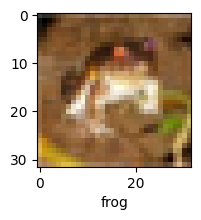

In [35]:
plot_sample(X_train, y_train, 0)

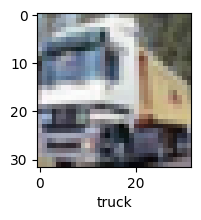

In [36]:
plot_sample(X_train, y_train, 1)

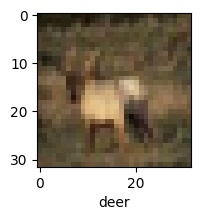

In [37]:
plot_sample(X_train, y_train, 3)

In [38]:
X_train = X_train/255
X_test = X_test /255

In [45]:
cnn = models.Sequential ([
    #convlution 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    #pooling
    layers.MaxPooling2D((2,2)),

    #convlution 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    #pooling
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [46]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])



In [47]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3837 - loss: 1.6877
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5962 - loss: 1.1545
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6544 - loss: 0.9931
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6815 - loss: 0.9058
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7052 - loss: 0.8323
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7285 - loss: 0.7814
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7455 - loss: 0.7355
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7597 - loss: 0.6911
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7747 - loss: 0.6407
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7839 - loss: 0.6193
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8010 - loss: 0.5760
Epoch 12/20
1563/15

In [48]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6984 - loss: 1.1569


[1.1909706592559814, 0.6919000148773193]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.80      0.79      0.80      1000
           2       0.58      0.62      0.60      1000
           3       0.51      0.46      0.48      1000
           4       0.65      0.65      0.65      1000
           5       0.60      0.56      0.58      1000
           6       0.77      0.79      0.78      1000
           7       0.76      0.70      0.73      1000
           8       0.80      0.81      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

